# Data Analysis Demo

What is Data Analysis? Simply put, analysing data to draw conclusions. Generally this involves two phases: aquiring / preparing the data, and analysing the data.

## Aquiring / preparing the Data

Before you begin to analyze data, you need to make sure that the data is ready to be analyzed. This involves things like:
1. Data Collection (typically at Scorpion the data collection is done automatically by various services)
2. Data Quality control - make sure the data was collected, reported, and stored in a way that doesn't have any inherent biases or errors.
3. Data Cleaning - often there will be missing data, or data you know is less reliable
4. Data Prep - often the data needs to be transformed or aggregated before analysis can begin

## Analysing the Data

This is the process of taking reliable data and trying to get business insights out of it. Here are the 4 main types of analysis:

1. Descriptive Analysis: Descriptive data analysis looks at past data and tells what happened. This is often used when tracking Key Performance Indicators (KPIs), revenue, sales leads, and more.
2. Diagnostic Analysis: Diagnostic data analysis aims to determine why something happened. Once your descriptive analysis shows that something negative or positive happened, diagnostic analysis can be done to figure out the reason. A business may see that leads increased in the month of October and use diagnostic analysis to determine which marketing efforts contributed the most.
3. Predictive Analysis: Predictive data analysis predicts what is likely to happen in the future. In this type of research, trends are derived from past data which are then used to form predictions about the future. For example, to predict next year’s revenue, data from previous years will be analyzed. If revenue has gone up 20% every year for many years, we would predict that revenue next year will be 20% higher than this year. This is a simple example, but predictive analysis can be applied to much more complicated issues such as risk assessment, sales forecasting, or qualifying leads.
4. Prescriptive Analysis: Prescriptive data analysis combines the information found from the previous 3 types of data analysis and forms a plan of action for the organization to face the issue or decision. This is where the data-driven choices are made.

# Demo
For this demo, I've selected a pretty famous and well studied dataset, the Ames Housing Dataset. Here's a link to a Kaggle page where you can download the data for yourself:
https://www.kaggle.com/c/home-data-for-ml-course/overview

I'll go over the basics of importing your data, summarising your data, basic cleaning, looking for insights and trends, and visualization. Of course, there's much more, but this should give a basic idea of what a day in the life of a data analyist might look like.

I downloaded the data from that website, and unzipped it all into my "data/" folder. Now I'm ready to begin!

First, I need to import the various libraries (or modules) that I'll be using. In Python, it's easy to import any library that you've already installed with pip or conda. In this case, I've installed these libraries (and many more) into a Conda Virtual Environment.

In each case, I'm importing "as", which just means I'm renaming them for my own purposes. That way, I can just write "pd" instead of writing "pandas" all the time. These are standard conventions for these libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now, before diving into the data itself, I'd like to read the "data_description.txt" file that came with the dataset. Of course, I could just open it in Windows, but why not practice using Python to read it? Now, it's very long, so I'll only print out the first 1000 characters for now, but I could print out the whole thing.

In [5]:
file_location = 'data/data_description.txt'
with open(file_location, 'r') as file:
    data_description = file.read()
    
first_thousand_chars = data_description[:1000]
print(first_thousand_chars)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

Wow, that's a lot of info about the columns. I'll probably just focus on a few of these for now.

Ok, let's import our data. pandas is a wonderful library for reading in tabular data (data in columns and rows).

The basic unit of pandas is a dataframe, which is like a fancy excel spreadsheet. Let's create one.

Note: in Jupyter notebooks, I can just write "df" and it will print, for mildly complex reasons. In general, you'd need to type "print(df)".

In [6]:
df = pd.read_csv('data/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [35]:
df.describe()
# .loc['count'].sort_values()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


pandas is smart, and only shows us a small sample of the data. We wouldn't be able to make sense of it if we saw all of it at once. By default, pandas limits to the first and last 5 rows, as well as the first and last 10 columns.

Let's see what all the columns are before we dive in any deeper.

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
columns = ['OverallCond', 'SalePrice', 'LotArea']
df.loc[20:40, columns].sort_values(columns)

,OverallCond,SalePrice,LotArea
30,4,40000,8500
39,5,82000,6040
36,5,145000,10859
40,5,160000,8658
33,5,165500,10552
32,5,179900,11049
22,5,230000,9742
25,5,256300,14230
34,5,277500,7313
27,5,306000,11478


In [22]:
df.sort_values('SalePrice', ascending = False)[:10][columns]

,OverallCond,SalePrice,LotArea
691,6,755000,21535
1182,5,745000,15623
1169,5,625000,35760
898,5,611657,12919
803,5,582933,13891
1046,5,556581,16056
440,5,555000,15431
769,5,538000,53504
178,5,501837,17423
798,5,485000,13518


pandas has lots of useful summary tools built into it. let's use a very helpful one, .describe

This function prints out a number of useful statistics for each numerical columns.

In [25]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Already we can see that there are some columns with missing data! Any column with a count less than 1495 is missing some data, as count looks for non-empty rows.

Some other things to cover:
1. Missing Data
2. Data Selection
2. Groupby
3. Graphing
5. Asking Questions of your Data

In [39]:
df[['OverallCond', 'LotArea', 'KitchenQual', 'YrSold']].groupby('YrSold').mean()

,OverallCond,LotArea
YrSold,,
2006,5.420382,10489.458599
2007,5.583587,10863.686930
2008,5.759868,10587.687500
2009,5.514793,10294.248521
2010,5.634286,10220.645714


In [40]:
df.KitchenQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [41]:
graph_input = df[['OverallCond', 'YrSold']].groupby('YrSold').mean().reset_index()
graph_input

,YrSold,OverallCond
0,2006,5.420382
1,2007,5.583587
2,2008,5.759868
3,2009,5.514793
4,2010,5.634286


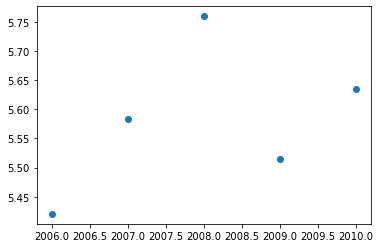

In [42]:
graph_input
plt.scatter(x = graph_input.YrSold, y = graph_input.OverallCond);

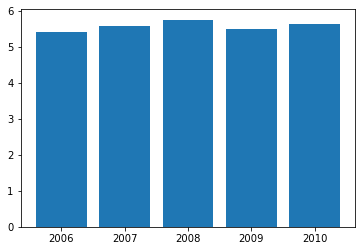

In [44]:
plt.bar(x = graph_input.YrSold, height = graph_input.OverallCond);

# Asking Questions of your Data

## What's the 75th percentile of house prices?

In [45]:
price_75 = df.SalePrice.describe()['75%']
price_75

214000.0

## What is the distribution of house quality in the 75th percentile?

In [46]:
answer_2 = df[df.SalePrice >= price_75].OverallQual.value_counts().sort_index().reset_index()
answer_2.columns = ['OverallQual', 'Count']
answer_2

,OverallQual,Count
0,4,1
1,5,5
2,6,31
3,7,127
4,8,144
5,9,43
6,10,16


## Make a bar chart for the previous info

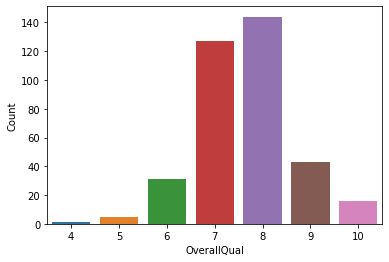

In [47]:
sns.barplot(x=answer_2.OverallQual, y=answer_2.Count);

## How does that compare to the distribution for the bottom 25% by price?

In [48]:
# if you're doing something more than once, write a function
def distribution_of_qual_within_percentile(lower, upper):
    lower_price = df.SalePrice.describe()[lower]
    upper_price = df.SalePrice.describe()[upper]
    output =  df[(df.SalePrice >= lower_price) & (df.SalePrice <= upper_price)].OverallQual.value_counts().sort_index().reset_index()
    output.columns = ['OverallQual', 'Count']
    return output


answer_3 = distribution_of_qual_within_percentile('min', '25%')
answer_3

,OverallQual,Count
0,1,2
1,2,3
2,3,19
3,4,94
4,5,173
5,6,69
6,7,4
7,8,1


In [49]:
distribution_of_qual_within_percentile('25%', '50%')

,OverallQual,Count
0,3,1
1,4,19
2,5,177
3,6,129
4,7,38
5,8,2
6,10,1


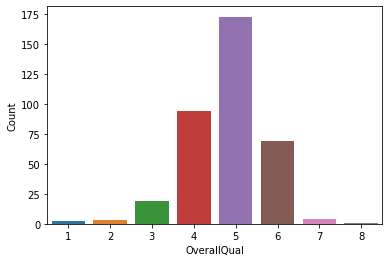

In [50]:
sns.barplot(x=answer_3.OverallQual, y=answer_3.Count);

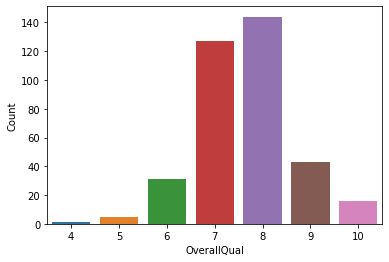

In [51]:
sns.barplot(x=answer_2.OverallQual, y=answer_2.Count);